In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import json
import random
from matplotlib.cm import viridis
from matplotlib.colors import to_rgba

plt.style.use('science')  # Optional: Change the style for consistent visuals

Text(0, 0.5, 'Pressure (Bar)')

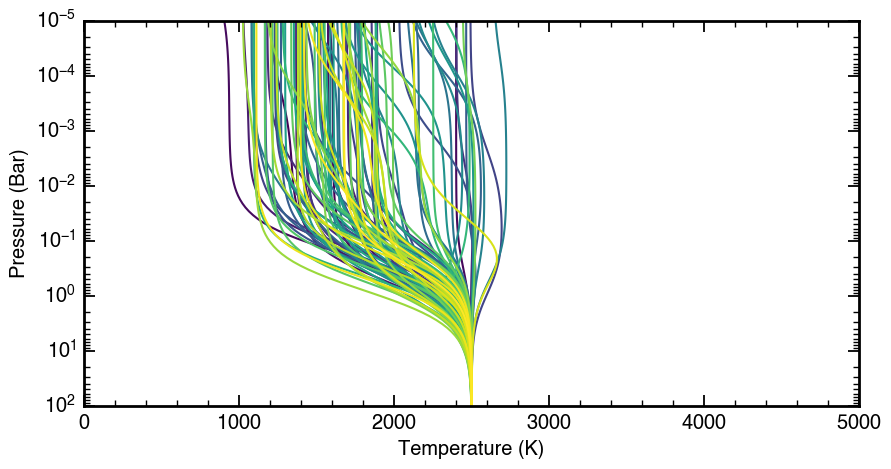

In [4]:
folder='Data/profiles'
base_filename='prof'
num_profiles=100

profile_files = glob.glob(os.path.join(folder, f"{base_filename}_*.json"))

# Randomly select a subset of profile files
if num_profiles < len(profile_files):
    profile_files = random.sample(profile_files, num_profiles)  # Randomly pick num_profiles files
else:
    print("Requested number of profiles exceeds available files. Using all available files.")

# Prepare the viridis colormap for the number of profiles
colors = [to_rgba(viridis(i / max(1, len(profile_files) - 1))) for i in range(len(profile_files))]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for profile_file, color in zip(profile_files, colors):
    with open(profile_file, 'r') as f:
        data = json.load(f)
    pressure = np.array(data['pressure'])
    temperature = np.array(data['temperature'])
    
    ax.semilogy(temperature, pressure, color=color)

ax.set_ylim(1e2, 1e-5)
ax.set_xlim(0, 5000)
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (Bar)')
#plt.savefig('Figures/pt_profiles.png', dpi=250)
#plt.close()

Text(0, 0.5, 'Pressure (Bar)')

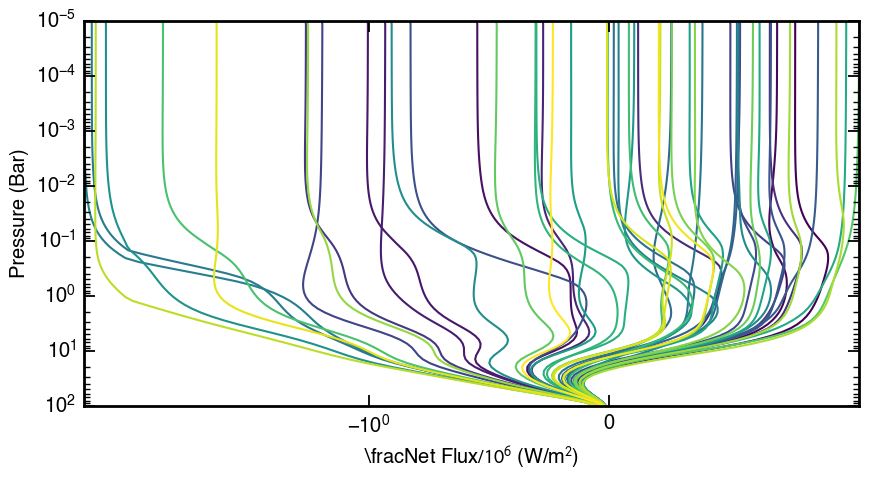

In [23]:
folder='Data/profiles'
base_filename='prof'
num_profiles=50

# Get list of profile files
profile_files = glob.glob(os.path.join(folder, f"{base_filename}_*.json"))

# Randomly select a subset of profile files
if num_profiles < len(profile_files):
    profile_files = random.sample(profile_files, num_profiles)  # Randomly pick num_profiles files
else:
    print("Requested number of profiles exceeds available files. Using all available files.")

# Prepare the viridis colormap for the number of profiles
colors = [to_rgba(viridis(i / max(1, len(profile_files) - 1))) for i in range(len(profile_files))]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for profile_file, color in zip(profile_files, colors):
    with open(profile_file, 'r') as f:
        data = json.load(f)
    pressure = np.array(data['pressure'])
    net_flux = np.array(data['net_flux'])
    
    plt.plot(net_flux / 1e6, pressure, color=color)

ax.set_yscale('log')
ax.set_xscale('symlog')

ax.set_ylim(1e2, 1e-5)
#ax.set_xlim(0, 3e5)

plt.xlabel(r'\fracNet Flux$/10^6$ (W/m$^2$)')
plt.ylabel('Pressure (Bar)')

#plt.savefig('Figures/fluxes.png', dpi=250)
#plt.close()

Text(0, 0.5, 'Pressure (Bar)')

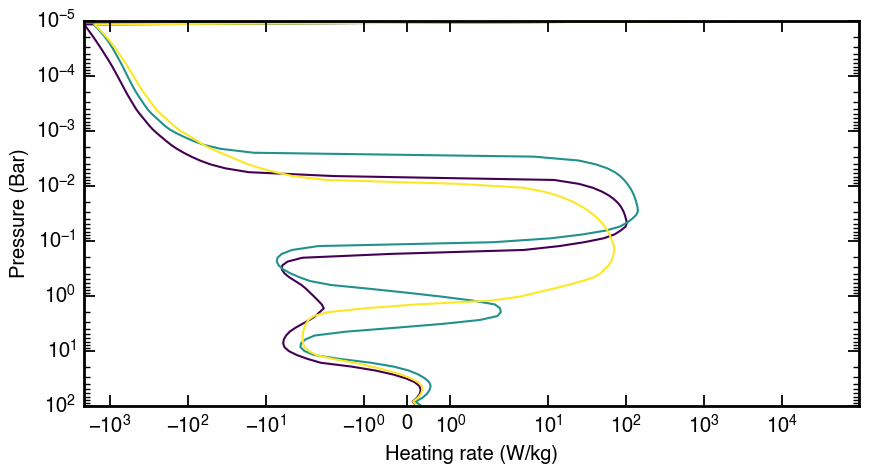

In [27]:
folder='Data/profiles'
base_filename='prof'
num_profiles=3

# Get list of profile files
profile_files = glob.glob(os.path.join(folder, f"{base_filename}_*.json"))

# Randomly select a subset of profile files
if num_profiles < len(profile_files):
    profile_files = random.sample(profile_files, num_profiles)  # Randomly pick num_profiles files
else:
    print("Requested number of profiles exceeds available files. Using all available files.")

# Prepare the viridis colormap for the number of profiles
colors = [to_rgba(viridis(i / max(1, len(profile_files) - 1))) for i in range(len(profile_files))]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

for profile_file, color in zip(profile_files, colors):
    with open(profile_file, 'r') as f:
        data = json.load(f)
    pressure = np.array(data['pressure'])  # Should be in Pa
    heating_rate = np.array(data['heating_rate'])

    plt.plot(heating_rate, pressure, color=color)

ax.set_yscale('log')
ax.set_xscale('symlog')

ax.set_ylim(1e2, 1e-5)
#ax.set_xlim(0, 3e5)

plt.xlabel(r'Heating rate (W/kg)')
plt.ylabel('Pressure (Bar)')

#plt.savefig('Figures/fluxes.png', dpi=250)
#plt.close()